<h3 style="text-align:center;direction:rtl;color:#3498DB;font-weight:bold"> بنام هستی </h3>

<h2 style="text-align:center;direction:rtl;color:#99cc00;font-weight:bold"> پیاده سازی الگوریتم K-Means در پایتون </h2>

<h3 style="text-align:center;direction:rtl;color:#99cc00;font-weight:bold"> پیش بینی با استفاده از یادگیری ماشین بدون نظارت </h3>

<h4 style="text-align:center;direction:rtl;color:#3498DB;font-weight:bold"> از دیتاست "آیریس"، تعداد بهینه خوشه ها را پیش بینی می کنیم و آن را بصورت بصری نشان خواهیم داد </h4>

In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans
import sklearn.metrics as sm
import warnings
warnings.filterwarnings('ignore')

In [121]:
data_iris = pd.read_csv('Iris.csv')

In [122]:
data_iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


### EDA


In [123]:
data_iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [124]:
data_iris['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

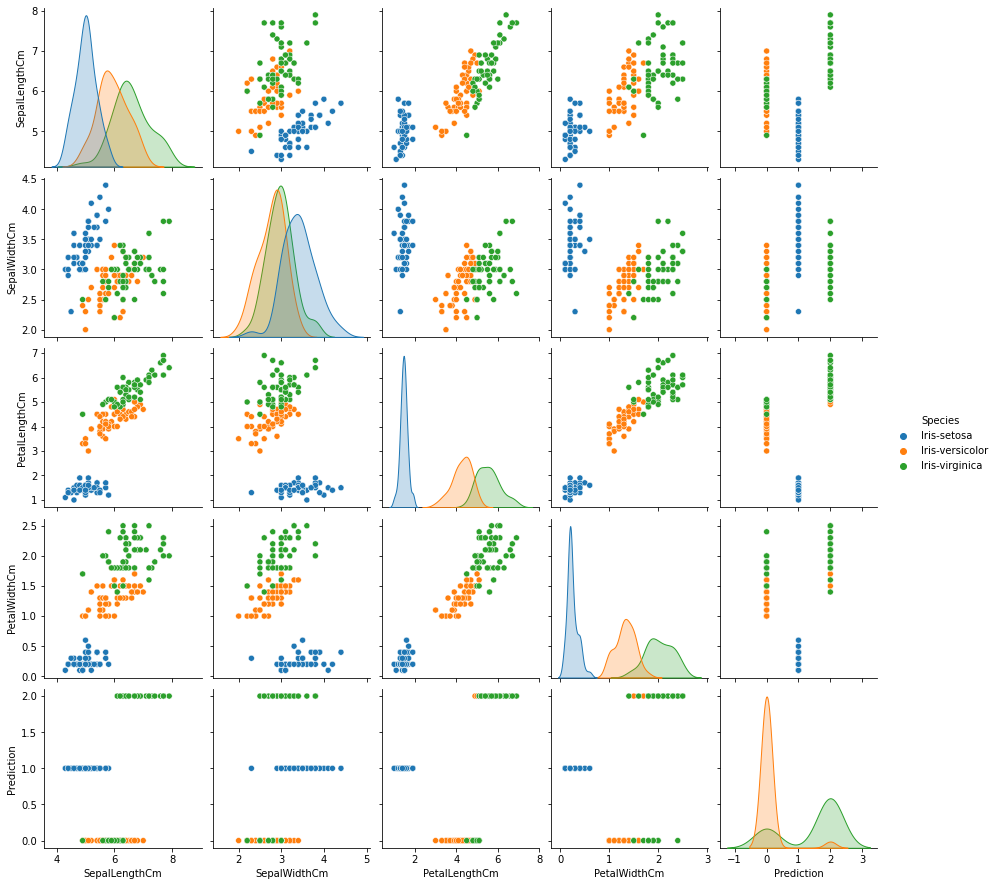

In [165]:
sns.pairplot(data_iris.iloc[:, 1:], hue="Species")

It is clearly visible that Iris setosa forms a separate cluster, whereas the other two species, Iris-versicolor and Iris-virginica are inseparable clusters.
<br><br> Also, with the images of the flowers below it is clear why the two clusters collide.
<br><br>
<b> Iris-Setosa</b>
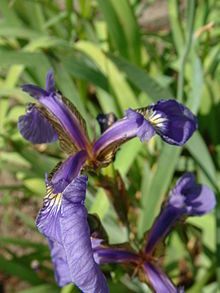
<b>Iris-Versicolor</b>
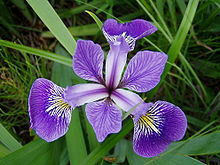
<b>Iris-Virginica</b>
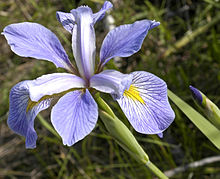

In [126]:
# Removing the unwanted columns from the data

data = data_iris.iloc[:,1:5]

### Calculating the optimal number of clusters 

In [127]:
SSE = []

In [128]:
for cluster in range(1,20):
    kmeans = KMeans( n_clusters = cluster)
    kmeans.fit(data)
    SSE.append(kmeans.inertia_)
    print(kmeans , kmeans.inertia_)

KMeans(n_clusters=1) 680.8244
KMeans(n_clusters=2) 152.36870647733906
KMeans(n_clusters=3) 78.94084142614602
KMeans(n_clusters=4) 57.31787321428571
KMeans(n_clusters=5) 46.535582051282056
KMeans(n_clusters=6) 38.93873974358975
KMeans(n_clusters=7) 34.19068792479662
KMeans() 29.881402210510906
KMeans(n_clusters=9) 28.040579356917597
KMeans(n_clusters=10) 26.192981319405234
KMeans(n_clusters=11) 24.71429478854479
KMeans(n_clusters=12) 23.14875210084034
KMeans(n_clusters=13) 21.711152565571687
KMeans(n_clusters=14) 20.401684704184703
KMeans(n_clusters=15) 19.48299533799534
KMeans(n_clusters=16) 18.05551767676768
KMeans(n_clusters=17) 17.671198773448776
KMeans(n_clusters=18) 16.070827497665736
KMeans(n_clusters=19) 15.358516594516596


In [129]:
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})

In [130]:
frame.head(10)

,Cluster,SSE
0,1,680.824400
1,2,152.368706
2,3,78.940841
3,4,57.317873
4,5,46.535582
5,6,38.938740
6,7,34.190688
7,8,29.881402
8,9,28.040579
9,10,26.192981


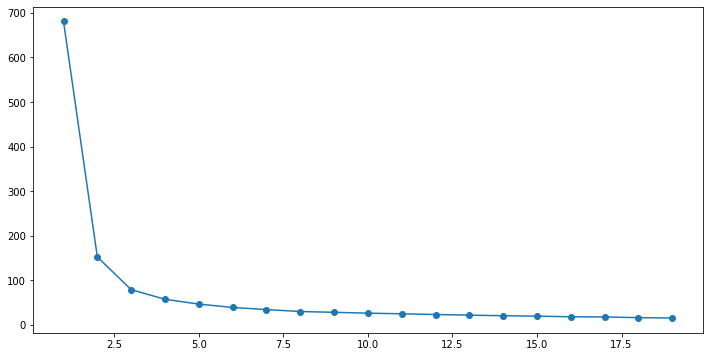

In [166]:
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')

ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major')

Looking at the last point where we got maximum drop, the value seems to be 3. Since K-Means uses distance metrics, we scale the data for better results. 

### Scaling the data

In [132]:
# Scaling the data 

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

data_scaled = scaler.fit_transform(data)


In [133]:
pd.DataFrame(data_scaled).describe()

,0,1,2,3
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-4.736952e-16,-6.631732e-16,3.315866e-16,-2.842171e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.438987e+00,-1.568735e+00,-1.444450e+00
25%,-9.006812e-01,-5.877635e-01,-1.227541e+00,-1.181504e+00
50%,-5.250608e-02,-1.249576e-01,3.362659e-01,1.332259e-01
75%,6.745011e-01,5.692513e-01,7.627586e-01,7.905908e-01
max,2.492019e+00,3.114684e+00,1.786341e+00,1.710902e+00


In [134]:
SSE_scaled = []

In [135]:
for cluster in range(1,20):
    kmeans = KMeans(n_clusters = cluster)
    kmeans.fit(data_scaled)
    SSE_scaled.append(kmeans.inertia_)

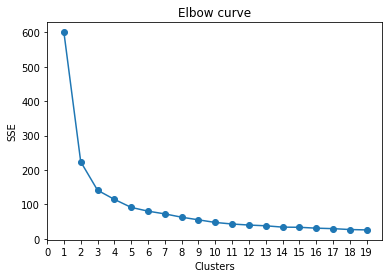

In [167]:
frame_scaled = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE_scaled})
plt.plot(frame_scaled['Cluster'], frame_scaled['SSE'], marker='o')
plt.title('Elbow curve')
plt.xlabel("Clusters")
plt.ylabel("SSE")
plt.xticks(range(20))

ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major')

<b>Using the elbow method, the optimum number of clusters calculated is 3.</b>
### Training the model 

In [137]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(data)
pred = kmeans.predict(data)

In [138]:
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [139]:
pd.Series(pred).value_counts()

0    62
1    50
2    38
dtype: int64

In [140]:
data_iris['Prediction'] = pred

In [141]:
data_iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Prediction
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,2
146,147,6.3,2.5,5.0,1.9,Iris-virginica,0
147,148,6.5,3.0,5.2,2.0,Iris-virginica,2
148,149,6.2,3.4,5.4,2.3,Iris-virginica,2


#### Analysing which Species to be assigned to each cluster.

In [142]:
data_iris[data_iris['Prediction']==0].head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Prediction
50,51,7.0,3.2,4.7,1.4,Iris-versicolor,0
51,52,6.4,3.2,4.5,1.5,Iris-versicolor,0
53,54,5.5,2.3,4.0,1.3,Iris-versicolor,0
54,55,6.5,2.8,4.6,1.5,Iris-versicolor,0
55,56,5.7,2.8,4.5,1.3,Iris-versicolor,0


In [143]:
data_iris[data_iris['Prediction']==1].head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Prediction
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1


In [144]:
data_iris[data_iris['Prediction']==2].head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Prediction
52,53,6.9,3.1,4.9,1.5,Iris-versicolor,2
77,78,6.7,3.0,5.0,1.7,Iris-versicolor,2
100,101,6.3,3.3,6.0,2.5,Iris-virginica,2
102,103,7.1,3.0,5.9,2.1,Iris-virginica,2
103,104,6.3,2.9,5.6,1.8,Iris-virginica,2


In [145]:
data_iris[data_iris['Prediction'] == 0]['Species'].value_counts()

Iris-versicolor    48
Iris-virginica     14
Name: Species, dtype: int64

In [146]:
data_iris[data_iris['Prediction'] == 1]['Species'].value_counts()

Iris-setosa    50
Name: Species, dtype: int64

In [147]:
data_iris[data_iris['Prediction'] == 2]['Species'].value_counts()

Iris-virginica     36
Iris-versicolor     2
Name: Species, dtype: int64

Therefore,
<ul>
    <li>0 - Iris - versicolor</li>
    <li>1 - Iris - setosa</li>
    <li>2 - Iris - virginica

### Visualization

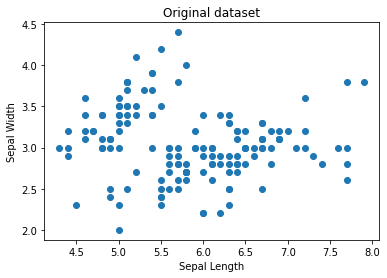

In [168]:
plt.scatter(data_iris.iloc[:,1], data_iris.iloc[:,2])
plt.title("Original dataset")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")

ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major')

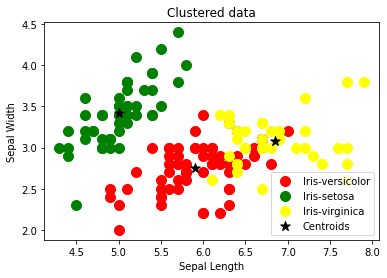

In [169]:
plt.scatter(data_iris[data_iris['Prediction'] == 0].iloc[:,1], data_iris[data_iris['Prediction'] == 0].iloc[:,2], s=100, c = 'red', label = 'Iris-versicolor')
plt.scatter(data_iris[data_iris['Prediction'] == 1].iloc[:,1], data_iris[data_iris['Prediction'] == 1].iloc[:,2], s=100, c = 'green', label = 'Iris-setosa')
plt.scatter(data_iris[data_iris['Prediction'] == 2].iloc[:,1], data_iris[data_iris['Prediction'] == 2].iloc[:,2], s=100, c = 'yellow', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'black', marker = '*', label = 'Centroids')
plt.title("Clustered data")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major')

### Evaluation Metrics

In [150]:
data_iris['Predicted species'] = ''
data_iris.loc[data_iris['Prediction'] == 0, 'Predicted species'] = 'Iris-versicolor'
data_iris.loc[data_iris['Prediction'] == 1, 'Predicted species'] = 'Iris-setosa'
data_iris.loc[data_iris['Prediction'] == 2, 'Predicted species'] = 'Iris-virginica'

In [151]:
data_iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Prediction,Predicted species
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1,Iris-setosa
...,...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,2,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica,0,Iris-versicolor
147,148,6.5,3.0,5.2,2.0,Iris-virginica,2,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica,2,Iris-virginica


In [152]:
sm.accuracy_score(data_iris['Species'], data_iris['Predicted species'])

0.8933333333333333

In [153]:
sm.confusion_matrix(data_iris['Species'], data_iris['Predicted species'])

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0, 14, 36]], dtype=int64)

<b>Therefore our model is 89% accurate</b>